# FlowDenoising User Manual

FlowDenoising is a low-pass filtering tool for volumetric data. A 1D Gaussian filter is applied to each dimension Z, Y and X (in this order), resulting in a 3D filtering. Unlike classical Gaussian filtering, the 2D slices (in each dimension) are aligned to minimize the smoothing of the structures recognized by the Optical Flow (OF) estimator.

## 1. Installing the required packages

In [1]:
!pip install -r ../requirements.txt

In [2]:
# Delete temporal files
#!rm -f *.mrc *.tif

## 2. Denoising using the default parameters

The default parameters are:

In [3]:
!python ../flowdenoising.py -h

usage: flowdenoising.py [-h] [-i INPUT] [-o OUTPUT] [-s SIGMA [SIGMA ...]]
                        [-l LEVELS] [-w WINSIDE] [-v VERBOSITY] [-n] [-m]

3D Gaussian filtering controlled by the optical flow.

options:
  -h, --help            show this help message and exit
  -i INPUT, --input INPUT
                        Input a MRC-file or a multi-image TIFF-file (default:
                        ./volume.mrc)
  -o OUTPUT, --output OUTPUT
                        Output a MRC-file or a multi-image TIFF-file (default:
                        ./denoised_volume.mrc)
  -s SIGMA [SIGMA ...], --sigma SIGMA [SIGMA ...]
                        Gaussian sigma for each dimension in the order (Z, Y,
                        X) (default: (2.0, 2.0, 2.0))
  -l LEVELS, --levels LEVELS
                        Number of levels of the Gaussian pyramid used by the
                        optical flow estimator (default: 0)
  -w WINSIDE, --winside WINSIDE
                        Side of the window used by th

### Download a (small) volume
This example uses a 32x256x256 (Z, Y, X) crop of the [EMPIAR-10311](https://www.ebi.ac.uk/empiar/EMPIAR-10310/) volume.

In [4]:
%%bash
OUTPUT_FILENAME="small_vol.mrc"
if test ! -f $OUTPUT_FILENAME ; then
    FILEID="1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB"
    wget --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O $OUTPUT_FILENAME 2> /dev/null
fi

In [5]:
!ls -l *.mrc

-rw-r--r-- 1 vruiz vruiz 419431424 feb  7 20:29 big_vol.mrc
-rw-r--r-- 1 vruiz vruiz 419431424 feb  8 15:28 denoised_big_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  8 14:53 denoised_small_vol_l0.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  8 14:54 denoised_small_vol_l3.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  8 14:52 denoised_small_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  8 14:55 denoised_small_vol_w17.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  8 14:54 denoised_small_vol_w3.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  8 14:51 denoised_vol.mrc
-rw-r--r-- 1 vruiz vruiz 419431424 feb  8 15:28 no_OF_denoised_big_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  7 22:11 small_vol.mrc


### Filter (using [MRC](https://en.wikipedia.org/wiki/MRC_(file_format)) files)

In [6]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_vol.mrc -v 1

[2023-02-08 14:51:15,987] (INFO) Verbosity level = 1
[2023-02-08 14:51:15,987] (INFO) 0 %
[2023-02-08 14:51:15,987] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-08 14:51:15,988] (INFO) reading "small_vol.mrc"
[2023-02-08 14:51:15,998] (INFO) shape of the input volume (Z, Y, X) = (32, 256, 256)
[2023-02-08 14:51:15,998] (INFO) type of the volume = float32
[2023-02-08 14:51:15,998] (INFO) read "small_vol.mrc" in 0.01048667300000039 seconds
[2023-02-08 14:51:15,998] (INFO) small_vol.mrc type = float32
[2023-02-08 14:51:15,999] (INFO) small_vol.mrc max = 255.0
[2023-02-08 14:51:16,001] (INFO) small_vol.mrc min = 0.0
[2023-02-08 14:51:16,002] (INFO) Input vol average = 163.53050231933594
[2023-02-08 14:51:16,002] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-08 14:51:16,003] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-08 14:51:16,004] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-08 14:51:16,005] (INFO) length of each filter (Z, Y, X) = [17, 17, 17]
[2023-02-08 1

In [7]:
!ls -l *.mrc

-rw-r--r-- 1 vruiz vruiz 419431424 feb  7 20:29 big_vol.mrc
-rw-r--r-- 1 vruiz vruiz 419431424 feb  8 06:42 denoised_big_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  8 06:09 denoised_small_vol_l0.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  8 06:10 denoised_small_vol_l3.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  8 14:51 denoised_small_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  8 06:11 denoised_small_vol_w17.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  8 06:10 denoised_small_vol_w3.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  8 14:51 denoised_vol.mrc
-rw-r--r-- 1 vruiz vruiz 419431424 feb  8 06:43 no_OF_denoised_big_vol.mrc
-rw-r--r-- 1 vruiz vruiz   8389632 feb  7 22:11 small_vol.mrc


### Filter (using multi-page [TIFF](https://en.wikipedia.org/wiki/TIFF) files)

In [8]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_vol.tif -v 1

[2023-02-08 14:51:56,263] (INFO) Verbosity level = 1
[2023-02-08 14:51:56,264] (INFO) 0 %
[2023-02-08 14:51:56,264] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-08 14:51:56,264] (INFO) reading "small_vol.mrc"
[2023-02-08 14:51:56,275] (INFO) shape of the input volume (Z, Y, X) = (32, 256, 256)
[2023-02-08 14:51:56,275] (INFO) type of the volume = float32
[2023-02-08 14:51:56,275] (INFO) read "small_vol.mrc" in 0.010658170999999772 seconds
[2023-02-08 14:51:56,275] (INFO) small_vol.mrc type = float32
[2023-02-08 14:51:56,276] (INFO) small_vol.mrc max = 255.0
[2023-02-08 14:51:56,277] (INFO) small_vol.mrc min = 0.0
[2023-02-08 14:51:56,278] (INFO) Input vol average = 163.53050231933594
[2023-02-08 14:51:56,278] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-08 14:51:56,279] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-08 14:51:56,280] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-08 14:51:56,281] (INFO) length of each filter (Z, Y, X) = [17, 17, 17]
[2023-02-08 

In [9]:
!ls -l *.tif

-rw-r--r-- 1 vruiz vruiz 2102554 feb  8 14:52 denoised_vol.tif
-rw-r--r-- 1 vruiz vruiz 2102554 feb  8 14:50 no_OF_denoised_vol.tif


### Filtering without optical flow (OF) compensation

In [60]:
%%time
!python ../flowdenoising_4.py -i small_vol.mrc -o no_OF_denoised_vol.tif --no_OF -v 1

[2023-02-12 12:20:38,036] (INFO) Verbosity level = 1
[2023-02-12 12:20:38,036] (INFO) 0 %
[2023-02-12 12:20:38,037] (INFO) sigma=(2.0, 2.0, 2.0)
[2023-02-12 12:20:38,037] (INFO) reading "small_vol.mrc"
[2023-02-12 12:20:38,064] (INFO) shape of the input volume (Z, Y, X) = (32, 256, 256)
[2023-02-12 12:20:38,065] (INFO) type of the volume = float32
[2023-02-12 12:20:38,065] (INFO) read "small_vol.mrc" in 0.015750774000000245 seconds
[2023-02-12 12:20:38,065] (INFO) small_vol.mrc type = float32
[2023-02-12 12:20:38,067] (INFO) small_vol.mrc max = 255.0
[2023-02-12 12:20:38,068] (INFO) small_vol.mrc min = 0.0
[2023-02-12 12:20:38,069] (INFO) Input vol average = 163.53050231933594
[2023-02-12 12:20:38,069] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-12 12:20:38,070] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-12 12:20:38,071] (INFO) Computing gaussian kernel with sigma=2.0
[2023-02-12 12:20:38,072] (INFO) length of each filter (Z, Y, X) = [17, 17, 17]
------------

In [9]:
!ls -l *.tif

-rw-r--r-- 1 vruiz vruiz 2102554 feb  8 14:52 denoised_vol.tif
-rw-r--r-- 1 vruiz vruiz 2102554 feb 10 21:10 no_OF_denoised_vol.tif


### Compare

In [61]:
import skimage.io
import mrcfile
vol_MRC = mrcfile.open("small_vol.mrc")
vol = vol_MRC.data
denoised_vol = skimage.io.imread("denoised_vol.tif", plugin="tifffile")
no_OF_denoised_vol = skimage.io.imread("no_OF_denoised_vol.tif", plugin="tifffile")

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<IPython.core.display.Math object>

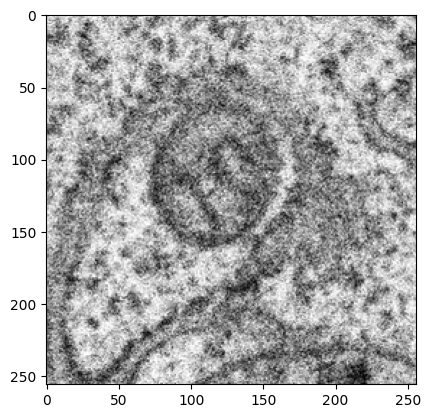

In [12]:
from IPython.display import display, Math
display(Math("\mathtt{Original~slice}:"))
imgplot = plt.imshow(vol[15], cmap="gray")

<IPython.core.display.Math object>

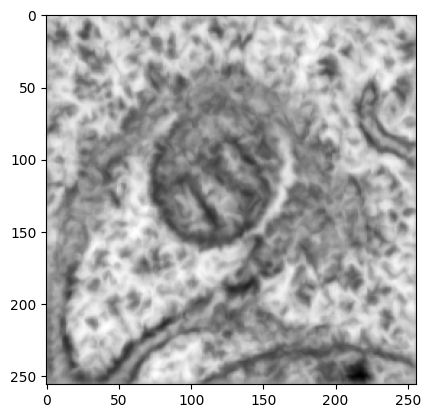

In [15]:
display(Math("\mathtt{Denoised~slice~using~OF~}(\sigma=2):"))
imgplot = plt.imshow(denoised_vol[15], cmap="gray")

<IPython.core.display.Math object>

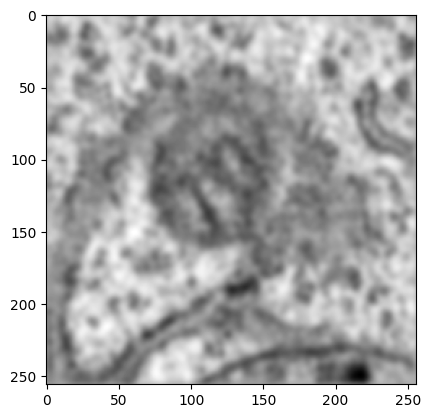

In [62]:
display(Math("\mathtt{Denoised~slice~using~standard~Gaussian~filtering~}(\sigma=2):"))
imgplot = plt.imshow(no_OF_denoised_vol[15], cmap="gray")

## 2. Controlling the length of the filters with the $\sigma$ parameters

### Example for $\sigma_\text{Z}=1.0, \sigma_\text{Y}=2.0~\text{and}~\sigma_\text{X}=0.1$
If $0<\sigma\le 0.1$, then no filtering is performed in the corresponding direction.

In [17]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_small_vol.mrc -s 1.0 2.0 0.1 -v 1 2>&1 | grep length

[2023-02-08 14:52:40,122] (INFO) length of each filter (Z, Y, X) = [9, 17, 1]
[2023-02-08 14:52:40,123] (INFO) Filtering along Z with l=0, w=5, and kernel length=9
[2023-02-08 14:52:45,809] (INFO) Filtering along Y with l=0, w=5, and kernel length=17
[2023-02-08 14:52:57,724] (INFO) Filtering along X with l=0, w=5, and kernel length=1
CPU times: user 344 ms, sys: 72.1 ms, total: 416 ms
Wall time: 19.1 s


<IPython.core.display.Math object>

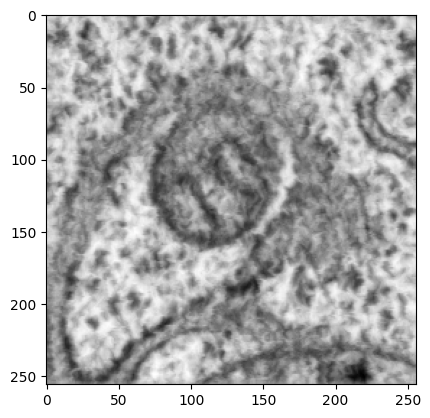

In [18]:
denoised_vol_MRC = mrcfile.open("denoised_small_vol.mrc")
denoised_vol = denoised_vol_MRC.data
display(Math("\mathtt{Denoised~slice~using~OF~}(\sigma_{\mathrm{Z}}=1.0, \sigma_{\mathrm{Y}}=2.0~\mathrm{and}~\sigma_{\mathrm{X}}=0.1):"))
imgplot = plt.imshow(denoised_vol[15], cmap="gray")

## 3. Controlling the search area with the `l` parameter

In [19]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_small_vol_l0.mrc -l 0 -v 1 2>&1 | grep "l="

[2023-02-08 14:52:59,702] (INFO) Filtering along Z with l=0, w=5, and kernel length=17
[2023-02-08 14:53:11,027] (INFO) Filtering along Y with l=0, w=5, and kernel length=17
[2023-02-08 14:53:22,758] (INFO) Filtering along X with l=0, w=5, and kernel length=17
CPU times: user 638 ms, sys: 159 ms, total: 797 ms
Wall time: 37.3 s


In [20]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_small_vol_l3.mrc -l 3 -v 1 2>&1 | grep "l="

[2023-02-08 14:53:36,997] (INFO) Filtering along Z with l=3, w=5, and kernel length=17
[2023-02-08 14:53:52,586] (INFO) Filtering along Y with l=3, w=5, and kernel length=17
[2023-02-08 14:54:04,751] (INFO) Filtering along X with l=3, w=5, and kernel length=17
CPU times: user 759 ms, sys: 177 ms, total: 936 ms
Wall time: 41.9 s


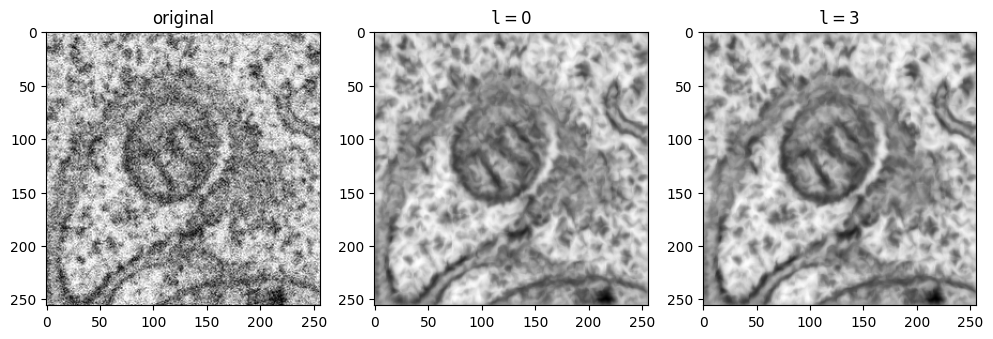

In [21]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
denoised_vol_MRC = mrcfile.open("denoised_small_vol_l0.mrc")
denoised_vol_l0 = denoised_vol_MRC.data
plt.subplot(1, 3, 1)
plt.title("original")
imgplot = plt.imshow(vol[15], cmap="gray")
plt.subplot(1, 3, 2)
plt.title(r"$\mathtt{l}=0$")
imgplot = plt.imshow(denoised_vol_l0[15], cmap="gray")
denoised_vol_MRC = mrcfile.open("denoised_small_vol_l3.mrc")
denoised_vol_l3 = denoised_vol_MRC.data
plt.subplot(1, 3, 3)
plt.title(r"$\mathtt{l}=3$")
imgplot = plt.imshow(denoised_vol_l3[15], cmap="gray")

## 4. Controlling the noise sensitivity with the `w` parameter

In [22]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_small_vol_w3.mrc -w 3 -v 1 2>&1 | grep "w="

[2023-02-08 14:54:20,328] (INFO) Filtering along Z with l=0, w=3, and kernel length=17
[2023-02-08 14:54:32,512] (INFO) Filtering along Y with l=0, w=3, and kernel length=17
[2023-02-08 14:54:45,247] (INFO) Filtering along X with l=0, w=3, and kernel length=17
CPU times: user 702 ms, sys: 158 ms, total: 860 ms
Wall time: 39.7 s


In [23]:
%%time
!python ../flowdenoising.py -i small_vol.mrc -o denoised_small_vol_w17.mrc -w 17 -v 1 2>&1 | grep "w="

[2023-02-08 14:55:00,007] (INFO) Filtering along Z with l=0, w=17, and kernel length=17
[2023-02-08 14:55:12,152] (INFO) Filtering along Y with l=0, w=17, and kernel length=17
[2023-02-08 14:55:24,609] (INFO) Filtering along X with l=0, w=17, and kernel length=17
CPU times: user 683 ms, sys: 179 ms, total: 862 ms
Wall time: 39.3 s


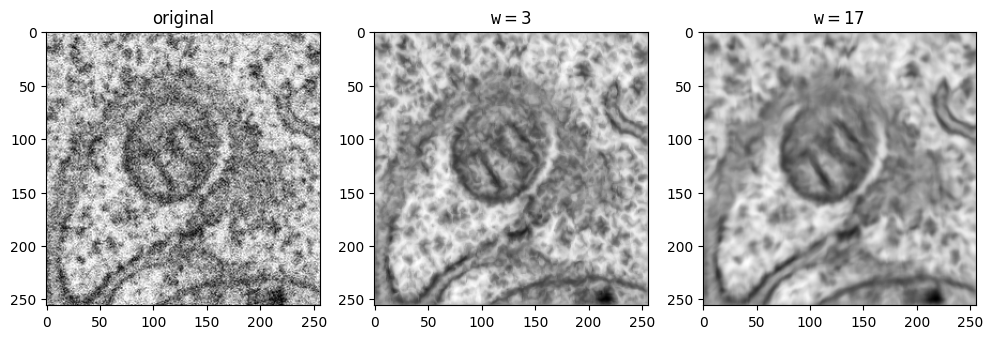

In [24]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
denoised_vol_MRC = mrcfile.open("denoised_small_vol_w3.mrc")
denoised_vol_w3 = denoised_vol_MRC.data
plt.subplot(1, 3, 1)
plt.title("original")
imgplot = plt.imshow(vol[15], cmap="gray")
plt.subplot(1, 3, 2)
plt.title(r"$\mathtt{w}=3$")
imgplot = plt.imshow(denoised_vol_w3[15], cmap="gray")
denoised_vol_MRC = mrcfile.open("denoised_small_vol_w17.mrc")
denoised_vol_w17 = denoised_vol_MRC.data
plt.subplot(1, 3, 3)
plt.title(r"$\mathtt{w}=17$")
imgplot = plt.imshow(denoised_vol_w17[15], cmap="gray")

## 4. Using a ("big") volume

In [25]:
%%bash
OUTPUT_FILENAME="big_vol.mrc"
if test ! -f $OUTPUT_FILENAME ; then
    FILEID="1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_"
    wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $OUTPUT_FILENAME && rm -rf /tmp/cookies.txt 2> /dev/null
fi

In [26]:
vol_MRC = mrcfile.open("big_vol.mrc")
vol = vol_MRC.data
print("(Z_size, Y_size, X_size) =", vol.shape)

(Z_size, Y_size, X_size) = (100, 1024, 1024)


In [27]:
%%time
!python ../flowdenoising.py -i big_vol.mrc -o denoised_big_vol.mrc -l 0

CPU times: user 37.8 s, sys: 7.24 s, total: 45 s
Wall time: 32min 33s


In [28]:
%%time
!python ../flowdenoising.py -i big_vol.mrc -o no_OF_denoised_big_vol.mrc --no_OF 

CPU times: user 1.06 s, sys: 251 ms, total: 1.31 s
Wall time: 43.7 s


In [29]:
denoised_vol_MRC = mrcfile.open("denoised_big_vol.mrc")
denoised_vol = denoised_vol_MRC.data
no_OF_denoised_vol_MRC = mrcfile.open("no_OF_denoised_big_vol.mrc")
no_OF_denoised_vol = no_OF_denoised_vol_MRC.data

<IPython.core.display.Math object>

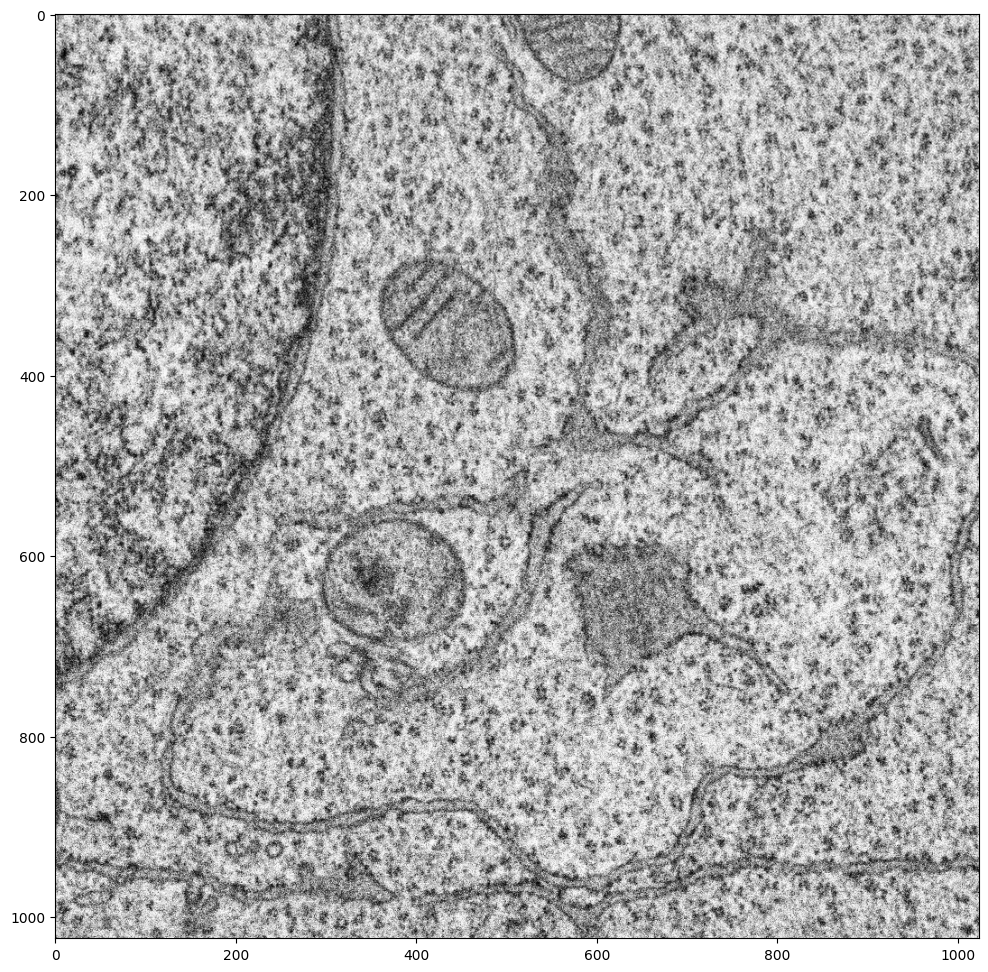

In [30]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
display(Math("\mathtt{Original~slice}:"))
imgplot = plt.imshow(vol[vol.shape[0]//2], cmap="gray")

<IPython.core.display.Math object>

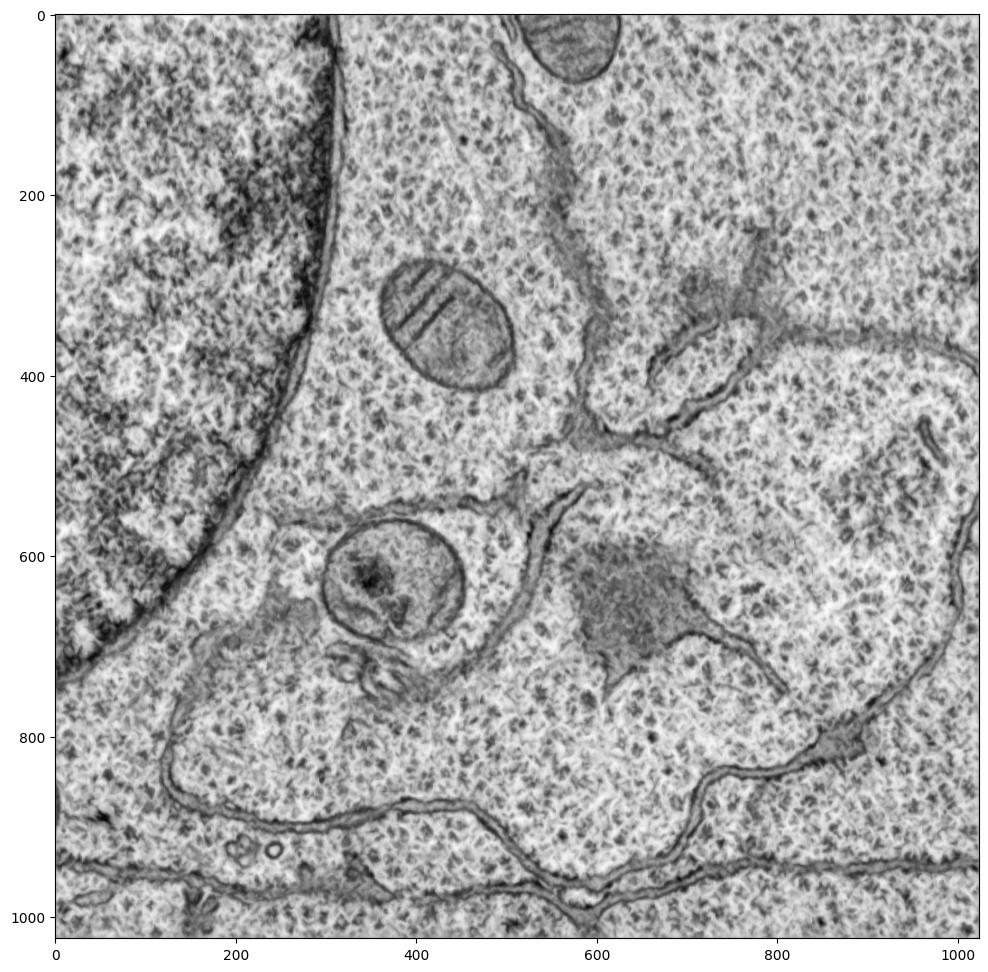

In [31]:
display(Math("\mathtt{Denoised~slice~using~OF}~(\sigma=2):"))
figure(figsize=(12, 12))
imgplot = plt.imshow(denoised_vol[vol.shape[0]//2], cmap="gray")

<IPython.core.display.Math object>

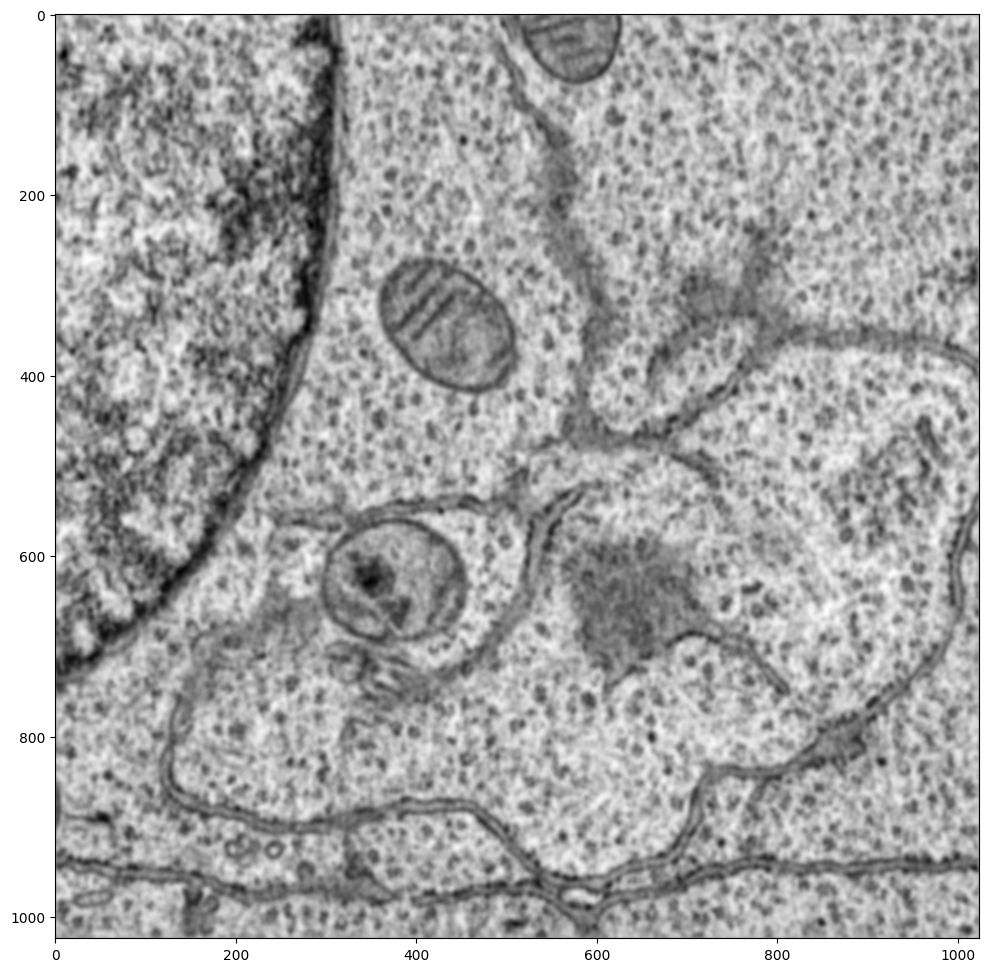

In [32]:
display(Math("\mathtt{Denoised~slice~using~standard~Gaussian~filtering}~(\sigma=2):"))
figure(figsize=(12, 12))
imgplot = plt.imshow(no_OF_denoised_vol[vol.shape[0]//2], cmap="gray")